In [111]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [112]:
data = pd.read_csv('/content/heart.csv')

In [113]:
# No missing value in our dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [114]:
# Removing Duplicates from dataset
data = data.drop_duplicates()
data.duplicated().any()

False

In [115]:
# Data Processing
cate_val = [] # Categorical columns
cont_val = [] # Numerical columns
for column in data.columns:
    if data[column].nunique() <=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [116]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [117]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [118]:
data['cp'].unique()

array([0, 1, 2, 3])

In [119]:
cate_val.remove('sex')
cate_val.remove('target')
data = pd.get_dummies(data,columns = cate_val,drop_first=True)

In [120]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [121]:
# Feature Scaling (Required for ML Algorithms)
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [122]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [123]:
X = data.drop('target',axis=1)
y = data['target']

In [124]:
# Training and Testing ML model
from sklearn.model_selection import train_test_split

In [125]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=42)

In [126]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [127]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [128]:
y_pred1 = log.predict(X_test)
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [129]:
# SVC
from sklearn import svm

In [130]:
svm = svm.SVC()
svm.fit(X_train,y_train)

SVC()

In [131]:
y_pred2 = svm.predict(X_test)
accuracy_score(y_test,y_pred2)

0.8032786885245902

In [132]:
# K Neighbours Classifier(KNN)
from sklearn.neighbors import KNeighborsClassifier

In [133]:
score = []
# n neighbours=40 to check for different accuracies
for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

In [134]:
# Accuracy is most for n=2 neighbours
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [135]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [136]:
y_pred3=knn.predict(X_test)
accuracy_score(y_test,y_pred3)

0.8032786885245902

In [137]:
# Non ML Algorithms
data = pd.read_csv('/content/heart.csv')
data = data.drop_duplicates()

In [138]:
X = data.drop('target',axis=1)
y=data['target']

In [139]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,
                                                random_state=42)

In [140]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

In [141]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [142]:
y_pred4= dt.predict(X_test)
accuracy_score(y_test,y_pred4)

0.7049180327868853

In [143]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [145]:
y_pred5= rf.predict(X_test)
accuracy_score(y_test,y_pred5)

0.8524590163934426

In [146]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

In [147]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [148]:
y_pred6 = gbc.predict(X_test)
accuracy_score(y_test,y_pred6)

0.8032786885245902

In [149]:
final_data = pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],
                          'Acc':[accuracy_score(y_test,y_pred1)*100,
                                accuracy_score(y_test,y_pred2)*100,
                                accuracy_score(y_test,y_pred3)*100,
                                accuracy_score(y_test,y_pred4)*100,
                                accuracy_score(y_test,y_pred5)*100,
                                accuracy_score(y_test,y_pred6)*100]})

In [150]:
final_data

,Models,Acc
0,LR,78.688525
1,SVM,80.327869
2,KNN,80.327869
3,DT,70.491803
4,RF,85.245902
5,GB,80.327869


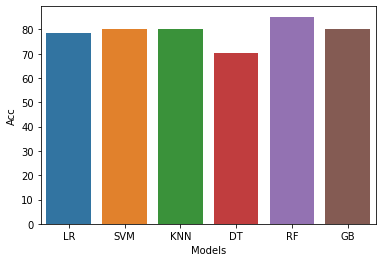

In [152]:
# Random Forest gives the highest accuracy model
import seaborn as sns
sns.barplot(final_data['Models'],final_data['Acc'])

In [153]:
# Heart Disease Prediction on New Data
new_data = pd.DataFrame({
    'age':52,
    'sex':1,
    'cp':0,
    'trestbps':125,
    'chol':212,
    'fbs':0,
    'restecg':1,
    'thalach':168,
    'exang':0,
    'oldpeak':1.0,
     'slope':2,
    'ca':2,
    'thal':3,    
},index=[0])

In [154]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [155]:
# Adding this new data to increase the dataset thereby increasing accuracy
data=data.append(new_data)

In [156]:
p = rf.predict(new_data)
if p[0]==0:
    print("No Heart Disease")
else:
    print("Heart Disease")

No Heart Disease
